# Rapido tutorial sull'uso dei classificatori in sklearn
Iniziamo caricando un dataset gia' contenuto in sklearn

In [1]:
import sklearn.datasets
import numpy as np
ds = sklearn.datasets.load_breast_cancer()

La variabile ds ora contiene un oggetto simile a un dizionario, con le seguenti chiavi

In [2]:
ds.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Vediamo la descrizione del dataset, che ce ne da un'introduzione

In [3]:
print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Altre chiavi interessanti:
- `data`, che contiene un array 2D con una riga per osservazione e una colonna per feature (i cui nomi stanno nell'array 1D `feature_names`).
- `target`, array 1D con un elemento per osservazione, contenente `0` e `1`; il loro significato e' nella chiave `target_names`.

Ecco qui sotto un modo compatto per rappresentare le informazioni contenute nel dataset; il codice non e' molto semplice per chi non e' molto familiare con il linguaggio e utilizza molti idiomi tipici di python: prova a capirlo a fondo.

In [4]:
for subject_data,target in zip(ds["data"],ds["target_names"][ds["target"]]):
    print(f"\n####### New subject ({target}):")
    for name,value in zip(ds["feature_names"],subject_data):
        print(f"{name}: {value}")


####### New subject (malignant):
mean radius: 17.99
mean texture: 10.38
mean perimeter: 122.8
mean area: 1001.0
mean smoothness: 0.1184
mean compactness: 0.2776
mean concavity: 0.3001
mean concave points: 0.1471
mean symmetry: 0.2419
mean fractal dimension: 0.07871
radius error: 1.095
texture error: 0.9053
perimeter error: 8.589
area error: 153.4
smoothness error: 0.006399
compactness error: 0.04904
concavity error: 0.05373
concave points error: 0.01587
symmetry error: 0.03003
fractal dimension error: 0.006193
worst radius: 25.38
worst texture: 17.33
worst perimeter: 184.6
worst area: 2019.0
worst smoothness: 0.1622
worst compactness: 0.6656
worst concavity: 0.7119
worst concave points: 0.2654
worst symmetry: 0.4601
worst fractal dimension: 0.1189

####### New subject (malignant):
mean radius: 20.57
mean texture: 17.77
mean perimeter: 132.9
mean area: 1326.0
mean smoothness: 0.08474
mean compactness: 0.07864
mean concavity: 0.0869
mean concave points: 0.07017
mean symmetry: 0.1812
mea

worst texture: 27.26
worst perimeter: 132.7
worst area: 1261.0
worst smoothness: 0.1446
worst compactness: 0.5804
worst concavity: 0.5274
worst concave points: 0.1864
worst symmetry: 0.427
worst fractal dimension: 0.1233

####### New subject (malignant):
mean radius: 16.74
mean texture: 21.59
mean perimeter: 110.1
mean area: 869.5
mean smoothness: 0.0961
mean compactness: 0.1336
mean concavity: 0.1348
mean concave points: 0.06018
mean symmetry: 0.1896
mean fractal dimension: 0.05656
radius error: 0.4615
texture error: 0.9197
perimeter error: 3.008
area error: 45.19
smoothness error: 0.005776
compactness error: 0.02499
concavity error: 0.03695
concave points error: 0.01195
symmetry error: 0.02789
fractal dimension error: 0.002665
worst radius: 20.01
worst texture: 29.02
worst perimeter: 133.5
worst area: 1229.0
worst smoothness: 0.1563
worst compactness: 0.3835
worst concavity: 0.5409
worst concave points: 0.1813
worst symmetry: 0.4863
worst fractal dimension: 0.08633

####### New subje

worst concave points: 0.1325
worst symmetry: 0.3021
worst fractal dimension: 0.07987

####### New subject (malignant):
mean radius: 15.1
mean texture: 22.02
mean perimeter: 97.26
mean area: 712.8
mean smoothness: 0.09056
mean compactness: 0.07081
mean concavity: 0.05253
mean concave points: 0.03334
mean symmetry: 0.1616
mean fractal dimension: 0.05684
radius error: 0.3105
texture error: 0.8339
perimeter error: 2.097
area error: 29.91
smoothness error: 0.004675
compactness error: 0.0103
concavity error: 0.01603
concave points error: 0.009222
symmetry error: 0.01095
fractal dimension error: 0.001629
worst radius: 18.1
worst texture: 31.69
worst perimeter: 117.7
worst area: 1030.0
worst smoothness: 0.1389
worst compactness: 0.2057
worst concavity: 0.2712
worst concave points: 0.153
worst symmetry: 0.2675
worst fractal dimension: 0.07873

####### New subject (benign):
mean radius: 11.52
mean texture: 18.75
mean perimeter: 73.34
mean area: 409.0
mean smoothness: 0.09524
mean compactness: 0.

worst smoothness: 0.1451
worst compactness: 0.1379
worst concavity: 0.08539
worst concave points: 0.07407
worst symmetry: 0.271
worst fractal dimension: 0.07191

####### New subject (malignant):
mean radius: 18.05
mean texture: 16.15
mean perimeter: 120.2
mean area: 1006.0
mean smoothness: 0.1065
mean compactness: 0.2146
mean concavity: 0.1684
mean concave points: 0.108
mean symmetry: 0.2152
mean fractal dimension: 0.06673
radius error: 0.9806
texture error: 0.5505
perimeter error: 6.311
area error: 134.8
smoothness error: 0.00794
compactness error: 0.05839
concavity error: 0.04658
concave points error: 0.0207
symmetry error: 0.02591
fractal dimension error: 0.007054
worst radius: 22.39
worst texture: 18.91
worst perimeter: 150.1
worst area: 1610.0
worst smoothness: 0.1478
worst compactness: 0.5634
worst concavity: 0.3786
worst concave points: 0.2102
worst symmetry: 0.3751
worst fractal dimension: 0.1108

####### New subject (malignant):
mean radius: 20.18
mean texture: 23.97
mean peri

compactness error: 0.03482
concavity error: 0.04232
concave points error: 0.01269
symmetry error: 0.02657
fractal dimension error: 0.004411
worst radius: 24.22
worst texture: 31.59
worst perimeter: 156.1
worst area: 1750.0
worst smoothness: 0.119
worst compactness: 0.3539
worst concavity: 0.4098
worst concave points: 0.1573
worst symmetry: 0.3689
worst fractal dimension: 0.08368

####### New subject (benign):
mean radius: 12.18
mean texture: 17.84
mean perimeter: 77.79
mean area: 451.1
mean smoothness: 0.1045
mean compactness: 0.07057
mean concavity: 0.0249
mean concave points: 0.02941
mean symmetry: 0.19
mean fractal dimension: 0.06635
radius error: 0.3661
texture error: 1.511
perimeter error: 2.41
area error: 24.44
smoothness error: 0.005433
compactness error: 0.01179
concavity error: 0.01131
concave points error: 0.01519
symmetry error: 0.0222
fractal dimension error: 0.003408
worst radius: 12.83
worst texture: 20.92
worst perimeter: 82.14
worst area: 495.2
worst smoothness: 0.114
w

mean fractal dimension: 0.06768
radius error: 0.4266
texture error: 0.9489
perimeter error: 2.989
area error: 41.18
smoothness error: 0.006985
compactness error: 0.02563
concavity error: 0.03011
concave points error: 0.01271
symmetry error: 0.01602
fractal dimension error: 0.003884
worst radius: 18.81
worst texture: 27.37
worst perimeter: 127.1
worst area: 1095.0
worst smoothness: 0.1878
worst compactness: 0.448
worst concavity: 0.4704
worst concave points: 0.2027
worst symmetry: 0.3585
worst fractal dimension: 0.1065

####### New subject (malignant):
mean radius: 15.78
mean texture: 22.91
mean perimeter: 105.7
mean area: 782.6
mean smoothness: 0.1155
mean compactness: 0.1752
mean concavity: 0.2133
mean concave points: 0.09479
mean symmetry: 0.2096
mean fractal dimension: 0.07331
radius error: 0.552
texture error: 1.072
perimeter error: 3.598
area error: 58.63
smoothness error: 0.008699
compactness error: 0.03976
concavity error: 0.0595
concave points error: 0.0139
symmetry error: 0.01

radius error: 0.4489
texture error: 2.508
perimeter error: 3.258
area error: 34.37
smoothness error: 0.006578
compactness error: 0.0138
concavity error: 0.02662
concave points error: 0.01307
symmetry error: 0.01359
fractal dimension error: 0.003707
worst radius: 13.33
worst texture: 25.48
worst perimeter: 86.16
worst area: 546.7
worst smoothness: 0.1271
worst compactness: 0.1028
worst concavity: 0.1046
worst concave points: 0.06968
worst symmetry: 0.1712
worst fractal dimension: 0.07343

####### New subject (benign):
mean radius: 11.43
mean texture: 15.39
mean perimeter: 73.06
mean area: 399.8
mean smoothness: 0.09639
mean compactness: 0.06889
mean concavity: 0.03503
mean concave points: 0.02875
mean symmetry: 0.1734
mean fractal dimension: 0.05865
radius error: 0.1759
texture error: 0.9938
perimeter error: 1.143
area error: 12.67
smoothness error: 0.005133
compactness error: 0.01521
concavity error: 0.01434
concave points error: 0.008602
symmetry error: 0.01501
fractal dimension error

perimeter error: 1.484
area error: 16.51
smoothness error: 0.005518
compactness error: 0.01562
concavity error: 0.01994
concave points error: 0.007924
symmetry error: 0.01799
fractal dimension error: 0.002484
worst radius: 13.59
worst texture: 25.22
worst perimeter: 86.6
worst area: 564.2
worst smoothness: 0.1217
worst compactness: 0.1788
worst concavity: 0.1943
worst concave points: 0.08211
worst symmetry: 0.3113
worst fractal dimension: 0.08132

####### New subject (malignant):
mean radius: 17.68
mean texture: 20.74
mean perimeter: 117.4
mean area: 963.7
mean smoothness: 0.1115
mean compactness: 0.1665
mean concavity: 0.1855
mean concave points: 0.1054
mean symmetry: 0.1971
mean fractal dimension: 0.06166
radius error: 0.8113
texture error: 1.4
perimeter error: 5.54
area error: 93.91
smoothness error: 0.009037
compactness error: 0.04954
concavity error: 0.05206
concave points error: 0.01841
symmetry error: 0.01778
fractal dimension error: 0.004968
worst radius: 20.47
worst texture: 2

worst perimeter: 73.07
worst area: 390.2
worst smoothness: 0.1301
worst compactness: 0.295
worst concavity: 0.3486
worst concave points: 0.0991
worst symmetry: 0.2614
worst fractal dimension: 0.1162

####### New subject (malignant):
mean radius: 16.46
mean texture: 20.11
mean perimeter: 109.3
mean area: 832.9
mean smoothness: 0.09831
mean compactness: 0.1556
mean concavity: 0.1793
mean concave points: 0.08866
mean symmetry: 0.1794
mean fractal dimension: 0.06323
radius error: 0.3037
texture error: 1.284
perimeter error: 2.482
area error: 31.59
smoothness error: 0.006627
compactness error: 0.04094
concavity error: 0.05371
concave points error: 0.01813
symmetry error: 0.01682
fractal dimension error: 0.004584
worst radius: 17.79
worst texture: 28.45
worst perimeter: 123.5
worst area: 981.2
worst smoothness: 0.1415
worst compactness: 0.4667
worst concavity: 0.5862
worst concave points: 0.2035
worst symmetry: 0.3054
worst fractal dimension: 0.09519

####### New subject (benign):
mean radiu


####### New subject (malignant):
mean radius: 19.18
mean texture: 22.49
mean perimeter: 127.5
mean area: 1148.0
mean smoothness: 0.08523
mean compactness: 0.1428
mean concavity: 0.1114
mean concave points: 0.06772
mean symmetry: 0.1767
mean fractal dimension: 0.05529
radius error: 0.4357
texture error: 1.073
perimeter error: 3.833
area error: 54.22
smoothness error: 0.005524
compactness error: 0.03698
concavity error: 0.02706
concave points error: 0.01221
symmetry error: 0.01415
fractal dimension error: 0.003397
worst radius: 23.36
worst texture: 32.06
worst perimeter: 166.4
worst area: 1688.0
worst smoothness: 0.1322
worst compactness: 0.5601
worst concavity: 0.3865
worst concave points: 0.1708
worst symmetry: 0.3193
worst fractal dimension: 0.09221

####### New subject (malignant):
mean radius: 14.45
mean texture: 20.22
mean perimeter: 94.49
mean area: 642.7
mean smoothness: 0.09872
mean compactness: 0.1206
mean concavity: 0.118
mean concave points: 0.0598
mean symmetry: 0.195
mean 

worst smoothness: 0.1405
worst compactness: 0.3046
worst concavity: 0.2806
worst concave points: 0.1138
worst symmetry: 0.3397
worst fractal dimension: 0.08365

####### New subject (benign):
mean radius: 10.2
mean texture: 17.48
mean perimeter: 65.05
mean area: 321.2
mean smoothness: 0.08054
mean compactness: 0.05907
mean concavity: 0.05774
mean concave points: 0.01071
mean symmetry: 0.1964
mean fractal dimension: 0.06315
radius error: 0.3567
texture error: 1.922
perimeter error: 2.747
area error: 22.79
smoothness error: 0.00468
compactness error: 0.0312
concavity error: 0.05774
concave points error: 0.01071
symmetry error: 0.0256
fractal dimension error: 0.004613
worst radius: 11.48
worst texture: 24.47
worst perimeter: 75.4
worst area: 403.7
worst smoothness: 0.09527
worst compactness: 0.1397
worst concavity: 0.1925
worst concave points: 0.03571
worst symmetry: 0.2868
worst fractal dimension: 0.07809

####### New subject (malignant):
mean radius: 19.8
mean texture: 21.56
mean perimet

mean concavity: 0.01053
mean concave points: 0.01108
mean symmetry: 0.1546
mean fractal dimension: 0.05754
radius error: 0.1153
texture error: 0.6745
perimeter error: 0.757
area error: 9.006
smoothness error: 0.003265
compactness error: 0.00493
concavity error: 0.006493
concave points error: 0.003762
symmetry error: 0.0172
fractal dimension error: 0.00136
worst radius: 13.2
worst texture: 20.37
worst perimeter: 83.85
worst area: 543.4
worst smoothness: 0.1037
worst compactness: 0.07776
worst concavity: 0.06243
worst concave points: 0.04052
worst symmetry: 0.2901
worst fractal dimension: 0.06783

####### New subject (benign):
mean radius: 11.3
mean texture: 18.19
mean perimeter: 73.93
mean area: 389.4
mean smoothness: 0.09592
mean compactness: 0.1325
mean concavity: 0.1548
mean concave points: 0.02854
mean symmetry: 0.2054
mean fractal dimension: 0.07669
radius error: 0.2428
texture error: 1.642
perimeter error: 2.369
area error: 16.39
smoothness error: 0.006663
compactness error: 0.059

mean radius: 17.29
mean texture: 22.13
mean perimeter: 114.4
mean area: 947.8
mean smoothness: 0.08999
mean compactness: 0.1273
mean concavity: 0.09697
mean concave points: 0.07507
mean symmetry: 0.2108
mean fractal dimension: 0.05464
radius error: 0.8348
texture error: 1.633
perimeter error: 6.146
area error: 90.94
smoothness error: 0.006717
compactness error: 0.05981
concavity error: 0.04638
concave points error: 0.02149
symmetry error: 0.02747
fractal dimension error: 0.005838
worst radius: 20.39
worst texture: 27.24
worst perimeter: 137.9
worst area: 1295.0
worst smoothness: 0.1134
worst compactness: 0.2867
worst concavity: 0.2298
worst concave points: 0.1528
worst symmetry: 0.3067
worst fractal dimension: 0.07484

####### New subject (malignant):
mean radius: 15.61
mean texture: 19.38
mean perimeter: 100.0
mean area: 758.6
mean smoothness: 0.0784
mean compactness: 0.05616
mean concavity: 0.04209
mean concave points: 0.02847
mean symmetry: 0.1547
mean fractal dimension: 0.05443
rad

mean texture: 18.18
mean perimeter: 127.2
mean area: 1145.0
mean smoothness: 0.1037
mean compactness: 0.1442
mean concavity: 0.1626
mean concave points: 0.09464
mean symmetry: 0.1893
mean fractal dimension: 0.05892
radius error: 0.4709
texture error: 0.9951
perimeter error: 2.903
area error: 53.16
smoothness error: 0.005654
compactness error: 0.02199
concavity error: 0.03059
concave points error: 0.01499
symmetry error: 0.01623
fractal dimension error: 0.001965
worst radius: 23.79
worst texture: 28.65
worst perimeter: 152.4
worst area: 1628.0
worst smoothness: 0.1518
worst compactness: 0.3749
worst concavity: 0.4316
worst concave points: 0.2252
worst symmetry: 0.359
worst fractal dimension: 0.07787

####### New subject (malignant):
mean radius: 16.24
mean texture: 18.77
mean perimeter: 108.8
mean area: 805.1
mean smoothness: 0.1066
mean compactness: 0.1802
mean concavity: 0.1948
mean concave points: 0.09052
mean symmetry: 0.1876
mean fractal dimension: 0.06684
radius error: 0.2873
text

worst area: 551.3
worst smoothness: 0.105
worst compactness: 0.2158
worst concavity: 0.1904
worst concave points: 0.07625
worst symmetry: 0.2685
worst fractal dimension: 0.07764

####### New subject (malignant):
mean radius: 20.09
mean texture: 23.86
mean perimeter: 134.7
mean area: 1247.0
mean smoothness: 0.108
mean compactness: 0.1838
mean concavity: 0.2283
mean concave points: 0.128
mean symmetry: 0.2249
mean fractal dimension: 0.07469
radius error: 1.072
texture error: 1.743
perimeter error: 7.804
area error: 130.8
smoothness error: 0.007964
compactness error: 0.04732
concavity error: 0.07649
concave points error: 0.01936
symmetry error: 0.02736
fractal dimension error: 0.005928
worst radius: 23.68
worst texture: 29.43
worst perimeter: 158.8
worst area: 1696.0
worst smoothness: 0.1347
worst compactness: 0.3391
worst concavity: 0.4932
worst concave points: 0.1923
worst symmetry: 0.3294
worst fractal dimension: 0.09469

####### New subject (benign):
mean radius: 10.49
mean texture: 1

worst texture: 21.38
worst perimeter: 91.11
worst area: 583.1
worst smoothness: 0.1256
worst compactness: 0.1928
worst concavity: 0.1167
worst concave points: 0.05556
worst symmetry: 0.2661
worst fractal dimension: 0.07961

####### New subject (benign):
mean radius: 12.67
mean texture: 17.3
mean perimeter: 81.25
mean area: 489.9
mean smoothness: 0.1028
mean compactness: 0.07664
mean concavity: 0.03193
mean concave points: 0.02107
mean symmetry: 0.1707
mean fractal dimension: 0.05984
radius error: 0.21
texture error: 0.9505
perimeter error: 1.566
area error: 17.61
smoothness error: 0.006809
compactness error: 0.009514
concavity error: 0.01329
concave points error: 0.006474
symmetry error: 0.02057
fractal dimension error: 0.001784
worst radius: 13.71
worst texture: 21.1
worst perimeter: 88.7
worst area: 574.4
worst smoothness: 0.1384
worst compactness: 0.1212
worst concavity: 0.102
worst concave points: 0.05602
worst symmetry: 0.2688
worst fractal dimension: 0.06888

####### New subject 

worst compactness: 0.1352
worst concavity: 0.04506
worst concave points: 0.05093
worst symmetry: 0.288
worst fractal dimension: 0.08083

####### New subject (benign):
mean radius: 14.76
mean texture: 14.74
mean perimeter: 94.87
mean area: 668.7
mean smoothness: 0.08875
mean compactness: 0.0778
mean concavity: 0.04608
mean concave points: 0.03528
mean symmetry: 0.1521
mean fractal dimension: 0.05912
radius error: 0.3428
texture error: 0.3981
perimeter error: 2.537
area error: 29.06
smoothness error: 0.004732
compactness error: 0.01506
concavity error: 0.01855
concave points error: 0.01067
symmetry error: 0.02163
fractal dimension error: 0.002783
worst radius: 17.27
worst texture: 17.93
worst perimeter: 114.2
worst area: 880.8
worst smoothness: 0.122
worst compactness: 0.2009
worst concavity: 0.2151
worst concave points: 0.1251
worst symmetry: 0.3109
worst fractal dimension: 0.08187

####### New subject (benign):
mean radius: 11.47
mean texture: 16.03
mean perimeter: 73.02
mean area: 402

mean symmetry: 0.1618
mean fractal dimension: 0.05557
radius error: 0.5781
texture error: 0.9168
perimeter error: 4.218
area error: 72.44
smoothness error: 0.006208
compactness error: 0.01906
concavity error: 0.02375
concave points error: 0.01461
symmetry error: 0.01445
fractal dimension error: 0.001906
worst radius: 24.31
worst texture: 26.37
worst perimeter: 161.2
worst area: 1780.0
worst smoothness: 0.1327
worst compactness: 0.2376
worst concavity: 0.2702
worst concave points: 0.1765
worst symmetry: 0.2609
worst fractal dimension: 0.06735

####### New subject (malignant):
mean radius: 20.2
mean texture: 26.83
mean perimeter: 133.7
mean area: 1234.0
mean smoothness: 0.09905
mean compactness: 0.1669
mean concavity: 0.1641
mean concave points: 0.1265
mean symmetry: 0.1875
mean fractal dimension: 0.0602
radius error: 0.9761
texture error: 1.892
perimeter error: 7.128
area error: 103.6
smoothness error: 0.008439
compactness error: 0.04674
concavity error: 0.05904
concave points error: 0.

worst concave points: 0.09173
worst symmetry: 0.2736
worst fractal dimension: 0.0732

####### New subject (malignant):
mean radius: 14.6
mean texture: 23.29
mean perimeter: 93.97
mean area: 664.7
mean smoothness: 0.08682
mean compactness: 0.06636
mean concavity: 0.0839
mean concave points: 0.05271
mean symmetry: 0.1627
mean fractal dimension: 0.05416
radius error: 0.4157
texture error: 1.627
perimeter error: 2.914
area error: 33.01
smoothness error: 0.008312
compactness error: 0.01742
concavity error: 0.03389
concave points error: 0.01576
symmetry error: 0.0174
fractal dimension error: 0.002871
worst radius: 15.79
worst texture: 31.71
worst perimeter: 102.2
worst area: 758.2
worst smoothness: 0.1312
worst compactness: 0.1581
worst concavity: 0.2675
worst concave points: 0.1359
worst symmetry: 0.2477
worst fractal dimension: 0.06836

####### New subject (benign):
mean radius: 12.21
mean texture: 14.09
mean perimeter: 78.78
mean area: 462.0
mean smoothness: 0.08108
mean compactness: 0.07

smoothness error: 0.005888
compactness error: 0.0231
concavity error: 0.02059
concave points error: 0.01075
symmetry error: 0.02578
fractal dimension error: 0.002267
worst radius: 14.1
worst texture: 28.88
worst perimeter: 89.0
worst area: 610.2
worst smoothness: 0.124
worst compactness: 0.1795
worst concavity: 0.1377
worst concave points: 0.09532
worst symmetry: 0.3455
worst fractal dimension: 0.06896

####### New subject (benign):
mean radius: 11.36
mean texture: 17.57
mean perimeter: 72.49
mean area: 399.8
mean smoothness: 0.08858
mean compactness: 0.05313
mean concavity: 0.02783
mean concave points: 0.021
mean symmetry: 0.1601
mean fractal dimension: 0.05913
radius error: 0.1916
texture error: 1.555
perimeter error: 1.359
area error: 13.66
smoothness error: 0.005391
compactness error: 0.009947
concavity error: 0.01163
concave points error: 0.005872
symmetry error: 0.01341
fractal dimension error: 0.001659
worst radius: 13.05
worst texture: 36.32
worst perimeter: 85.07
worst area: 5

mean symmetry: 0.1724
mean fractal dimension: 0.06053
radius error: 0.4331
texture error: 1.001
perimeter error: 3.008
area error: 52.49
smoothness error: 0.009087
compactness error: 0.02715
concavity error: 0.05546
concave points error: 0.0191
symmetry error: 0.02451
fractal dimension error: 0.004005
worst radius: 22.03
worst texture: 25.07
worst perimeter: 146.0
worst area: 1479.0
worst smoothness: 0.1665
worst compactness: 0.2942
worst concavity: 0.5308
worst concave points: 0.2173
worst symmetry: 0.3032
worst fractal dimension: 0.08075

####### New subject (malignant):
mean radius: 18.82
mean texture: 21.97
mean perimeter: 123.7
mean area: 1110.0
mean smoothness: 0.1018
mean compactness: 0.1389
mean concavity: 0.1594
mean concave points: 0.08744
mean symmetry: 0.1943
mean fractal dimension: 0.06132
radius error: 0.8191
texture error: 1.931
perimeter error: 4.493
area error: 103.9
smoothness error: 0.008074
compactness error: 0.04088
concavity error: 0.05321
concave points error: 0.

texture error: 1.705
perimeter error: 1.516
area error: 13.86
smoothness error: 0.007334
compactness error: 0.02589
concavity error: 0.02941
concave points error: 0.009166
symmetry error: 0.01745
fractal dimension error: 0.004302
worst radius: 13.09
worst texture: 37.88
worst perimeter: 85.07
worst area: 523.7
worst smoothness: 0.1208
worst compactness: 0.1856
worst concavity: 0.1811
worst concave points: 0.07116
worst symmetry: 0.2447
worst fractal dimension: 0.08194

####### New subject (benign):
mean radius: 14.53
mean texture: 13.98
mean perimeter: 93.86
mean area: 644.2
mean smoothness: 0.1099
mean compactness: 0.09242
mean concavity: 0.06895
mean concave points: 0.06495
mean symmetry: 0.165
mean fractal dimension: 0.06121
radius error: 0.306
texture error: 0.7213
perimeter error: 2.143
area error: 25.7
smoothness error: 0.006133
compactness error: 0.01251
concavity error: 0.01615
concave points error: 0.01136
symmetry error: 0.02207
fractal dimension error: 0.003563
worst radius:

worst symmetry: 0.2409
worst fractal dimension: 0.06743

####### New subject (benign):
mean radius: 10.88
mean texture: 15.62
mean perimeter: 70.41
mean area: 358.9
mean smoothness: 0.1007
mean compactness: 0.1069
mean concavity: 0.05115
mean concave points: 0.01571
mean symmetry: 0.1861
mean fractal dimension: 0.06837
radius error: 0.1482
texture error: 0.538
perimeter error: 1.301
area error: 9.597
smoothness error: 0.004474
compactness error: 0.03093
concavity error: 0.02757
concave points error: 0.006691
symmetry error: 0.01212
fractal dimension error: 0.004672
worst radius: 11.94
worst texture: 19.35
worst perimeter: 80.78
worst area: 433.1
worst smoothness: 0.1332
worst compactness: 0.3898
worst concavity: 0.3365
worst concave points: 0.07966
worst symmetry: 0.2581
worst fractal dimension: 0.108

####### New subject (benign):
mean radius: 12.83
mean texture: 15.73
mean perimeter: 82.89
mean area: 506.9
mean smoothness: 0.0904
mean compactness: 0.08269
mean concavity: 0.05835
mean

worst texture: 22.15
worst perimeter: 95.29
worst area: 633.7
worst smoothness: 0.1533
worst compactness: 0.3842
worst concavity: 0.3582
worst concave points: 0.1407
worst symmetry: 0.323
worst fractal dimension: 0.1033

####### New subject (benign):
mean radius: 12.47
mean texture: 17.31
mean perimeter: 80.45
mean area: 480.1
mean smoothness: 0.08928
mean compactness: 0.0763
mean concavity: 0.03609
mean concave points: 0.02369
mean symmetry: 0.1526
mean fractal dimension: 0.06046
radius error: 0.1532
texture error: 0.781
perimeter error: 1.253
area error: 11.91
smoothness error: 0.003796
compactness error: 0.01371
concavity error: 0.01346
concave points error: 0.007096
symmetry error: 0.01536
fractal dimension error: 0.001541
worst radius: 14.06
worst texture: 24.34
worst perimeter: 92.82
worst area: 607.3
worst smoothness: 0.1276
worst compactness: 0.2506
worst concavity: 0.2028
worst concave points: 0.1053
worst symmetry: 0.3035
worst fractal dimension: 0.07661

####### New subject 

perimeter error: 3.218
area error: 67.36
smoothness error: 0.006176
compactness error: 0.01877
concavity error: 0.02913
concave points error: 0.01046
symmetry error: 0.01559
fractal dimension error: 0.002725
worst radius: 21.86
worst texture: 26.2
worst perimeter: 142.2
worst area: 1493.0
worst smoothness: 0.1492
worst compactness: 0.2536
worst concavity: 0.3759
worst concave points: 0.151
worst symmetry: 0.3074
worst fractal dimension: 0.07863

####### New subject (malignant):
mean radius: 19.89
mean texture: 20.26
mean perimeter: 130.5
mean area: 1214.0
mean smoothness: 0.1037
mean compactness: 0.131
mean concavity: 0.1411
mean concave points: 0.09431
mean symmetry: 0.1802
mean fractal dimension: 0.06188
radius error: 0.5079
texture error: 0.8737
perimeter error: 3.654
area error: 59.7
smoothness error: 0.005089
compactness error: 0.02303
concavity error: 0.03052
concave points error: 0.01178
symmetry error: 0.01057
fractal dimension error: 0.003391
worst radius: 23.73
worst texture:

worst radius: 24.3
worst texture: 25.48
worst perimeter: 160.2
worst area: 1809.0
worst smoothness: 0.1268
worst compactness: 0.3135
worst concavity: 0.4433
worst concave points: 0.2148
worst symmetry: 0.3077
worst fractal dimension: 0.07569

####### New subject (malignant):
mean radius: 14.27
mean texture: 22.55
mean perimeter: 93.77
mean area: 629.8
mean smoothness: 0.1038
mean compactness: 0.1154
mean concavity: 0.1463
mean concave points: 0.06139
mean symmetry: 0.1926
mean fractal dimension: 0.05982
radius error: 0.2027
texture error: 1.851
perimeter error: 1.895
area error: 18.54
smoothness error: 0.006113
compactness error: 0.02583
concavity error: 0.04645
concave points error: 0.01276
symmetry error: 0.01451
fractal dimension error: 0.003756
worst radius: 15.29
worst texture: 34.27
worst perimeter: 104.3
worst area: 728.3
worst smoothness: 0.138
worst compactness: 0.2733
worst concavity: 0.4234
worst concave points: 0.1362
worst symmetry: 0.2698
worst fractal dimension: 0.08351


mean radius: 7.76
mean texture: 24.54
mean perimeter: 47.92
mean area: 181.0
mean smoothness: 0.05263
mean compactness: 0.04362
mean concavity: 0.0
mean concave points: 0.0
mean symmetry: 0.1587
mean fractal dimension: 0.05884
radius error: 0.3857
texture error: 1.428
perimeter error: 2.548
area error: 19.15
smoothness error: 0.007189
compactness error: 0.00466
concavity error: 0.0
concave points error: 0.0
symmetry error: 0.02676
fractal dimension error: 0.002783
worst radius: 9.456
worst texture: 30.37
worst perimeter: 59.16
worst area: 268.6
worst smoothness: 0.08996
worst compactness: 0.06444
worst concavity: 0.0
worst concave points: 0.0
worst symmetry: 0.2871
worst fractal dimension: 0.07039


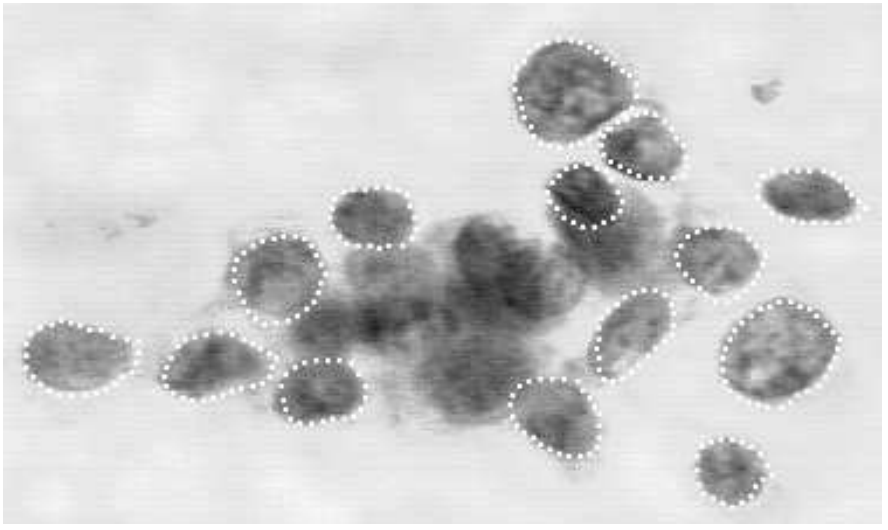
Altre informazioni sul dataset: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf


Prendiamo le prime due feature (come definito sopra, corrispondono a `radius (mean)` e `texture (mean)`).

In [5]:
X = ds.data[:,[0,1]]
y = ds.target

Ora addestriamo una regressione logistica per predire `y` da `X`

In [6]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)

C:\Users\Alessandro\Anaconda3\envs\general\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Applichiamo il classificatore ai dati su cui l'abbiamo appena addestrato e calcoliamone l'accuratezza.  Questo valore **non significa nulla** perche' non abbiamo fatto correttamente lo split tra dati di training e dati di testing.

In [7]:
y_hat = clf.predict(X)
np.mean(y_hat == y)

0.8927943760984183

Scegliamo 400 elementi a caso del dataset e mettiamoli nel training test; gli altri li mettiamo nel testing set.

In [8]:
ix = np.random.permutation(len(y))
ix_tr = ix[:400]
ix_te = ix[400:]
X_tr, X_te = X[ix_tr,:], X[ix_te,:]
y_tr, y_te = y[ix_tr], y[ix_te]

In [9]:
# Parentesi: capito come funziona permutation?
np.random.permutation(10)

array([4, 0, 1, 3, 9, 8, 2, 5, 6, 7])

Ora addestriamo un classificatore SOLO sui dati di training, e calcoliamone l'accuratezza SOLO sui dati di testing.

In [10]:
import sklearn.linear_model
import sklearn.dummy
clf = sklearn.linear_model.LogisticRegression()

# Questo e' un classificatore che restituisce degli score scelti a caso.  Verifica che accuratezza ottiene!
#clf = sklearn.dummy.DummyClassifier(strategy="uniform")  

# Questo e' un classificatore che restituisce sempre la classe piu' frequente nel training set.  Verifica che accuratezza ottiene!
#clf = sklearn.dummy.DummyClassifier(strategy="most_frequent")  

clf.fit(X_tr,y_tr)
np.mean(clf.predict(X_te)==y_te)

C:\Users\Alessandro\Anaconda3\envs\general\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9112426035502958

Otteniamo gli score dal classificatore

In [11]:
yhat_te = clf.predict(X_te)
scores_te = clf.predict_proba(X_te)
print(yhat_te.shape) # Un valore per osservazione
print(scores_te.shape) # Nota che ha due colonne: una per lo score di ciascuna delle due classi. Una riga per osservazione

# Gli elementi di ciascuna riga sommano a uno
assert(np.all(np.isclose(np.sum(scores_te,axis=1),1)))

# il metodo predict mi restituisce la classe che ha lo score maggiore tra le due
t = 0.5
scores_te_class1 = scores_te[:,1]
assert(np.all((scores_te_class1 > t) == yhat_te))

(169,)
(169, 2)
